In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# <font color="red">Test I: Wednesday, March 18th 11:00 - 11:45am </font>
- Use `numpy` and `pandas` to perform data handling.
- Use `sklearn` to train linear regression, polynomial regression, and logistic regression models.
- Understand how cost functions measure errors of the predictions.
- Understand how normal equation and gradient descent works

# Logistic Regression

*Readings: Chapter 4*

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

## Logistic Regression: Intuition
- Picture the data as points on the plane.
- A classifier's job is to determine the decision regions for each class.
- If a point is far from the decision boundary, then the classifier should be fairly confident about its prediction.
- If a point is near the decision boundary, then the classifier may be less confident about its prediction.
- The **logistic regression** model aims to provide a **probablity distribution** for each point. The probability distribution has little variance if the point is far from decision boundary.
- **Probability distribution with high variance**: rolling a die - there is no way to predict the exact outcome
- **Probability distribution with low variance**: getting the flu today - probably not going to happen

<img src="https://mlr-org.com/docs/2015-07-28-Visualisation-of-predictions_files/figure-html/qda-1.png" width="600">

## Binary Classifier
- Suppose there are only two classes for the output feature: **Class 0** (the negative class) and **Class 1** (the positive class).
- A **binary classifer** tries to estimate the probability $p$ that a point belongs to Class 1.
- The probability that a point belongs to Class 0 is $1 - p$.
- Given the probability, the binary classifier will compare it with a chosen **threshold** (for example, 0.5), and then predict the class as
    - prediction = 1 if $\hat{p}$ $\ge$ threshold
    - prediction = 0 if $\hat{p}$ < threshold
- The **boundary** of decision regions is given by the curve formed by points whose probability equals to the threshold value.

## Logistic Regression: Model Assumption
**Binary classifier model**: Logistic regression model assumes that the decision boundary is represented as a linear function:

$\log\frac{\hat{p}}{1 - \hat{p}} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n,$
- n: number of input features.
- $x_1, ..., x_n$: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

100


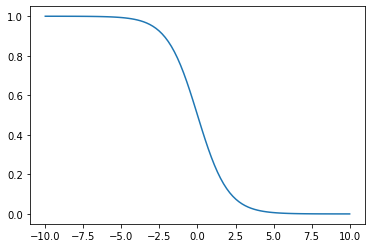

In [2]:
# Plot the graph of logistic function

# 1. Pick a list of x coordinates (`np.linspace`)
x = np.linspace(-10, 10, 100)

# 2. For each x, find the value of the function
# values = []
# for i in x:
#     value = 1 / (1+ np.exp(-i))
#     values.append(values)

values = 1 / (1 + np.exp(x)) # since x is a numpy array, we can apply np.exp() directly 

# 3. Plot the list of x coordinates and y coordinates using plt.plot()
plt.plot(x, values)
print(len(values))

## Logistic Regression: Decision Rule

**Decision rule**: Pick a threshold (for example, 0.5), and then

- prediction = 1 if $\hat{p}$ $\ge$ threshold
- prediction = 0 if $\hat{p}$ < threshold

**Trade-off with threshold**:
- If threshold is chosen closer to 1, then the positive predictions are __more likely__ to be correct (fewer **false positives**). However, the negative predictions are __less likely__ to be correct.
- If threshold is chosen closer to 0, then the negative predictions are __more likely__ to be correct (fewer **false negatives**). However, the positive predictions are __less likely__ to be correct.

<img src="https://hackernoon.com/hn-images/1*YV7zy1NGN1-HGQxY56nc_Q.png" width="600">

## Logistic Regression Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)

<img src="https://lh3.googleusercontent.com/proxy/kGs0Y8tElhGYuH6BUpxNg4F14JsepyVrrWUfMoN-uUKaJh-V3AUHsWI6b4zBTy3z-ipCrXMG8IRQxaiIRyxMfSU" width="600">


In [3]:
# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Explore the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Add the target class
# print(iris['target'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Create a function that maps 0-2 to the actual type of iris
def get_target_name(x):
    return iris['target_names'][x]

x = iris_df.loc[0, 'target']
name = get_target_name(x)
print(x, name)

0 setosa


In [10]:
# Apply get_target_name() to all target values
iris_df['target_name'] = iris_df['target'].apply(get_target_name)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


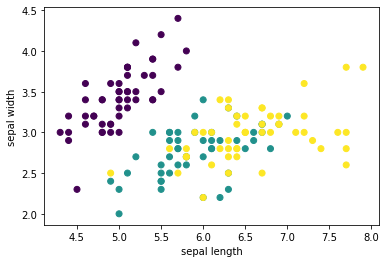

In [14]:
# Draw scatter plots.
# scatter plot: sepal length vs. sepal width
# Use .loc to extract sepal length is too tedious:
# iris_df['sepal length (cm)']
# Use .iloc is much easier: we just need to use its integer index
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

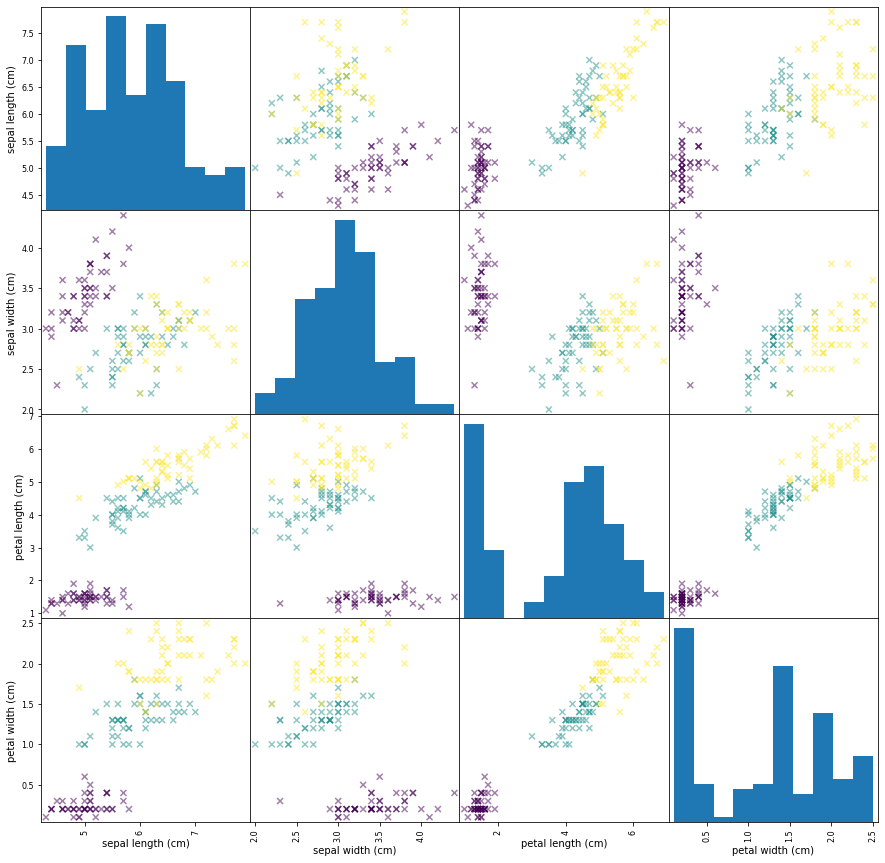

In [13]:
# Draw all scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:, :4], figsize=(15, 15), marker='x',
               c=iris_df['target'])
plt.show()

## Build A Binary Classifier for Iris-Virginica

In [15]:
# Define a function is_virginica(target) that returns 1 if target is Virginica, and 0 otherwise

def is_virginica(x):
    if target == 'virginica':
        return 1
    else: 
        return 0
target = iris_df.loc[50, 'target_name']
print(target, is_virginica(target))

versicolor 0


In [17]:
# Apply function is_virginica() to the data frame, creating a new column "Is_Virginica"
iris_df['Is_Virginica'] = iris_df['target_name'].apply(is_virginica)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [30]:
# Train-test split
# Split the data frame into 85% training data and 15% test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris_df, test_size = 0.15)
print(df_train.shape, df_test.shape)

(127, 7) (23, 7)


In [31]:
# Display the amount of Virginica and non-Virginica cases in the training set
print(df_train['Is_Virginica'].value_counts())
print(df_test['Is_Virginica'].value_counts())

0    127
Name: Is_Virginica, dtype: int64
0    23
Name: Is_Virginica, dtype: int64


In [ ]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

## Model Evaluation
- Classification accuracy
- Cross Validation
- Examine four categories using the confusion matrix:
    - True Positive
    - True Negative
    - False Positive
    - False Negative
- Precision, recall, and F1 score

In [ ]:
# 1. Find the prediction accuracy on test set
from sklearn.metrics import accuracy_score



In [ ]:
# 2. cross validation
from sklearn.model_selection import cross_val_score
input_cols = iris_df.columns[:4]
print(cross_val_score(model, df_train[input_cols], df_train['is_virginica'],
                      cv=3))

In [ ]:
# 3. confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(df_test['is_virginica'], test_predictions)
plt.matshow(matrix)
print(matrix)

### Precision and Recall
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width="600">

In [ ]:
# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
Y_pred = model2.predict(X)
Y_pred_prob = model2.predict_proba(X)


## Logistic Regression: Model Visualization
- Create a grid of points from a list of x coordinates and y coordinates.
- Use the model to obtain prediction probability on each point from the grid
- Find points with marginal probabilities.
- Plot the grid.

In [ ]:
# Train a new logistic regression model on petal length and petal width only
model = LogisticRegression(solver='lbfgs')
model.fit(df_train['petal length (cm)', 'petal width (cm)'], df_train['is_virginica'])

In [ ]:
# 1. Create a grid of points
x0, x1 = np.meshgrid(np.linspace(0, 7, 500),
                     np.linspace(0, 2.7, 500))
print(x0.shape, x1.shape)

In [ ]:
# 2. Obtain prediction probabilities
X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model.predict_proba(X_new)

In [ ]:
# 3. Find boundary points.
# Which points give 0.5 probability?
indices = np.where((y_new_prob[:, 1] > 0.499) & (y_new_prob[:, 1] < 0.501))
X_boundary = X_new[indices]

In [ ]:
# 4. Plot the boundary
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
index_virginica = (iris_df['is_virginica'] == 1)
index_not_virginica = (iris_df['is_virginica'] == 0)
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()

In [ ]:
# 5. Plot probabilities
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_prob[:, 0])
plt.colorbar()
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()